### K-Means Clustering algorithm from scratch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.typing import NDArray

### Helper functions

In [2]:
def euc_dist(point: NDArray, centroids: NDArray):
    """
        `point` shape => (n,)
        `centroids` is ndarray with shape (m, n)
        Returns ndarray with shape (m,), which represents
            distances from the point to center points.
    """
    distances = []
    for centroid in centroids:
        diff = point - centroid
        distances.append(np.sqrt(np.dot(diff.T, diff)))
    return np.array(distances)

In [3]:
def calc_clusters(X: NDArray, centroids: NDArray):
    """
        `X` shape => (m1, n)
        `centroids` shape => (m2, n)
        Returns clusters shape => (m1,)
    """
    clusters = []
    for point in X:
        distances = euc_dist(point, centroids)
        clusters.append(distances.argmin())
    return np.array(clusters)

In [4]:
def calc_centroids(X: NDArray, clusters: NDArray, n_clusters: int):
    """
        `X` shape => (m1, n)
        `clusters` shape => (m1,)
        `n_clusters` is number of clusters
        Returns centroids shape => (m2,n)
    """
    centroids = []
    for i in range(n_clusters):
        centroid = X[clusters==i].mean(axis=0)
        centroids.append(centroid)
    return np.array(centroids)

### 1D

In [5]:
def plot_1d(X: NDArray, centroids: NDArray, clusters: NDArray):
    """
        `X` shape => (m1, 1)
        `centroids` shape => (m2, 1)
        `clusters` shape => (m1,)
    """
    plt.figure(figsize=(8, 0.5))
    plt.scatter(X[:, 0], np.zeros(X.shape[0]), c=clusters)
    plt.scatter(centroids, np.zeros(centroids.shape[0]), marker='*')
    
    for x in centroids:
        plt.axvline(x=x[0])
    plt.show()

#### 1D: Initial

[[ 2.24468281]
 [ 7.14145854]
 [-4.48623183]]


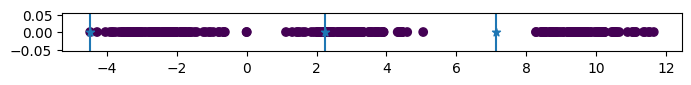

In [6]:
points_1d = pd.read_csv('data/1d_points.csv').to_numpy()

n_clusters = 3

np.random.seed(1) # set seed for reproducibility
centroids1d_0 = np.random.uniform(low=points_1d.min(), high=points_1d.max(), size=(n_clusters, points_1d.shape[1]))
print(centroids1d_0)
clusters1d_0 = np.zeros(points_1d.shape)
plot_1d(points_1d, centroids1d_0, clusters1d_0)

#### 1D: Iteration 1

In [7]:
clusters1d_1 = calc_clusters(X=points_1d, centroids=centroids1d_0)
print(clusters1d_1)

[2 1 2 0 2 1 1 2 2 2 1 0 2 0 2 0 0 2 0 1 1 1 1 1 1 0 0 0 2 2 1 0 2 2 2 0 1
 2 0 0 2 0 2 1 0 2 1 0 2 1 0 1 0 0 2 0 2 0 1 1 0 1 0 2 0 1 0 1 1 2 1 0 0 2
 0 0 2 1 2 0 0 2 2 2 0 1 1 0 2 2 0 0 0 1 2 2 1 1 1 2 0 2 0 0 2 0 2 0 1 0 0
 2 1 0 1 1 1 1 1 1 2 0 1 2 2 0 1 0 0 1 0 0 0 0 2 2 2 1 2 2 1 1 0 1 0 1 1 2
 0 2 0 2 2 2 1 0 1 1 0 0 1 2 1 1 0 0 2 2 0 2 0 1 0 1 1 0 0 0 0 1 0 0 1 2 2
 2 2 2 2 0 1 0 1 0 1 0 0 0 0 1 2 2 0 1 0 1 2 1 0 0 2 1 1 1 1 1 0 1 0 2 1 0
 2 2 0 1 2 1 1 1 1 0 1 1 0 0 1 2 1 1 2 0 0 2 0 1 1 0 1 1 2 2 2 1 2 0 2 1 2
 0 1 2 2 0 1 1 1 0 0 0 1 2 0 1 2 0 1 0 1 2 0 2 2 2 0 1 2 1 2 0 1 0 2 0 0 0
 1 1 2 0]


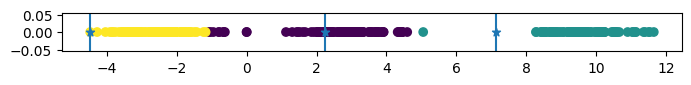

In [8]:
plot_1d(X=points_1d, centroids=centroids1d_0, clusters=clusters1d_1)

In [9]:
centroids1d_1 = calc_centroids(X=points_1d, clusters=clusters1d_1, n_clusters=n_clusters)
print(centroids1d_1)

[[ 2.62891885]
 [ 9.65424119]
 [-2.60553108]]


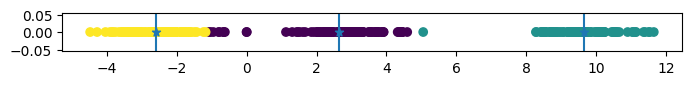

In [10]:
plot_1d(X=points_1d, centroids=centroids1d_1, clusters=clusters1d_1)

In [11]:
# check
all(centroids1d_1 == centroids1d_0)

False

#### 1D: Iteration 2

In [12]:
clusters1d_2 = calc_clusters(X=points_1d, centroids=centroids1d_1)
print(clusters1d_2)

[2 1 2 0 2 1 1 2 2 2 1 0 2 0 2 0 0 2 0 1 1 1 1 1 1 0 0 0 2 2 1 0 2 2 2 0 1
 2 2 0 2 2 2 1 0 2 1 0 2 1 0 1 0 0 2 0 2 0 1 1 0 1 0 2 0 1 0 1 1 2 1 0 0 2
 0 2 2 1 2 2 0 2 2 2 0 1 1 0 2 2 0 0 0 1 2 2 1 1 1 2 2 2 0 0 2 0 2 0 1 0 0
 2 1 0 1 1 1 1 1 1 2 0 1 2 2 0 1 0 0 1 0 0 0 0 2 2 2 1 2 2 1 1 0 1 0 1 1 2
 0 2 0 2 2 2 1 0 1 1 2 0 1 2 1 1 0 0 2 2 2 2 0 0 0 1 1 0 0 0 0 1 0 0 1 2 2
 2 2 2 2 0 1 0 1 0 1 0 0 0 0 1 2 2 0 1 0 1 2 1 0 2 2 1 1 1 1 1 2 1 0 2 1 0
 2 2 0 1 2 1 1 1 1 0 1 1 0 0 1 2 1 1 2 0 0 2 0 1 1 0 1 1 2 2 2 1 2 0 2 1 2
 0 1 2 2 0 1 1 1 0 0 0 1 2 0 1 2 0 1 2 1 2 0 2 2 2 0 1 2 1 2 0 1 0 2 0 0 0
 1 1 2 0]


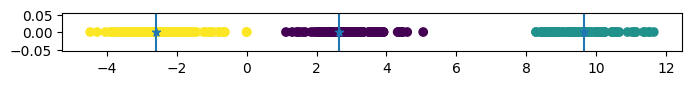

In [13]:
plot_1d(X=points_1d, centroids=centroids1d_1, clusters=clusters1d_2)

In [14]:
centroids1d_2 = calc_centroids(X=points_1d, clusters=clusters1d_2, n_clusters=n_clusters)
print(centroids1d_2)

[[ 2.98252374]
 [ 9.70026753]
 [-2.41146409]]


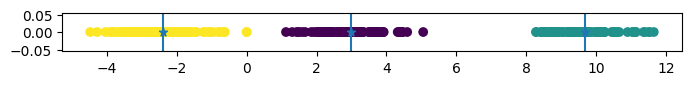

In [15]:
plot_1d(X=points_1d, centroids=centroids1d_2, clusters=clusters1d_2)

In [16]:
# check
all(centroids1d_2 == centroids1d_1)

False

#### 1D: Iteration 3

In [17]:
clusters1d_3 = calc_clusters(X=points_1d, centroids=centroids1d_2)
print(clusters1d_3)

[2 1 2 0 2 1 1 2 2 2 1 0 2 0 2 0 0 2 0 1 1 1 1 1 1 0 0 0 2 2 1 0 2 2 2 0 1
 2 2 0 2 2 2 1 0 2 1 0 2 1 0 1 0 0 2 0 2 0 1 1 0 1 0 2 0 1 0 1 1 2 1 0 0 2
 0 2 2 1 2 2 0 2 2 2 0 1 1 0 2 2 0 0 0 1 2 2 1 1 1 2 2 2 0 0 2 0 2 0 1 0 0
 2 1 0 1 1 1 1 1 1 2 0 1 2 2 0 1 0 0 1 0 0 0 0 2 2 2 1 2 2 1 1 0 1 0 1 1 2
 0 2 0 2 2 2 1 0 1 1 2 0 1 2 1 1 0 0 2 2 2 2 0 0 0 1 1 0 0 0 0 1 0 0 1 2 2
 2 2 2 2 0 1 0 1 0 1 0 0 0 0 1 2 2 0 1 0 1 2 1 0 2 2 1 1 1 1 1 2 1 0 2 1 0
 2 2 0 1 2 1 1 1 1 0 1 1 0 0 1 2 1 1 2 0 0 2 0 1 1 0 1 1 2 2 2 1 2 0 2 1 2
 0 1 2 2 0 1 1 1 0 0 0 1 2 0 1 2 0 1 2 1 2 0 2 2 2 0 1 2 1 2 0 1 0 2 0 0 0
 1 1 2 0]


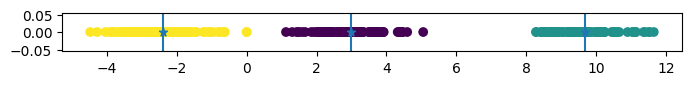

In [18]:
plot_1d(X=points_1d, centroids=centroids1d_2, clusters=clusters1d_3)

In [19]:
centroids1d_3 = calc_centroids(X=points_1d, clusters=clusters1d_3, n_clusters=n_clusters)
print(centroids1d_3)

[[ 2.98252374]
 [ 9.70026753]
 [-2.41146409]]


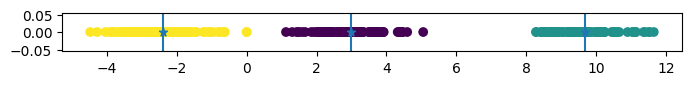

In [20]:
plot_1d(X=points_1d, centroids=centroids1d_3, clusters=clusters1d_3)

In [21]:
# check
all(centroids1d_3 == centroids1d_2)

True

It is True, which means centroids did not change in the last iteration, so final clusters array is `clusters1d_3`.

### 2D

In [22]:
def plot_2d(X: NDArray, centroids: NDArray, clusters: NDArray):
    """
        `X` shape => (m1, 2)
        `centroids` shape => (m2, 2)
        `clusters` shape => (m1,)
    """
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=clusters)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red')

    plt.show()

#### 2D: Initial

In [23]:
points_2d = pd.read_csv('data/2d_points.csv').to_numpy()
n_clusters = 3

np.random.seed(1) # set seed for reproducibility
centroids2d_0 = np.random.uniform(low=points_2d.min(), high=points_2d.max(), size=(n_clusters, points_2d.shape[1]))
print(centroids2d_0)

[[-0.80968612  5.85993561]
 [-9.9774849  -3.33170673]
 [-6.75283796 -7.9494743 ]]


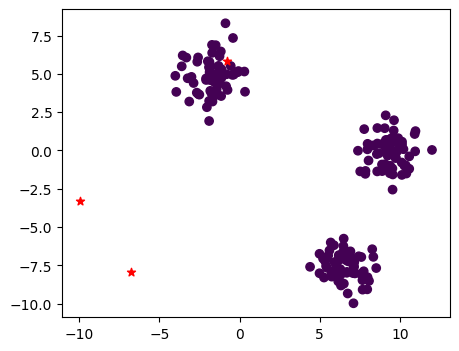

In [24]:
clusters2d_0 = np.zeros(points_2d.shape[0])
plot_2d(X=points_2d, centroids=centroids2d_0, clusters=clusters2d_0)

#### 2D: Iteration 1

In [25]:
clusters2d_1 = calc_clusters(X=points_2d, centroids=centroids1d_0)
print(clusters2d_1)

[0 0 2 1 2 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 2 0 0 0 1 0 0 0 1 0 0 0 0 2 0
 1 0 1 0 1 0 0 2 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0]


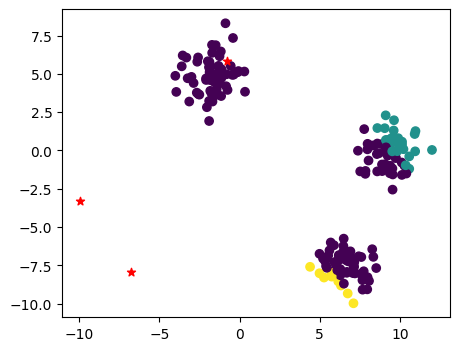

In [26]:
plot_2d(X=points_2d, centroids=centroids2d_0, clusters=clusters2d_1)

In [27]:
centroids2d_1 = calc_centroids(X=points_2d, clusters=clusters2d_1, n_clusters=n_clusters)
print(centroids2d_1)

[[ 3.6805625  -0.7506875 ]
 [ 9.84709677  0.54354839]
 [ 5.83333333 -8.53888889]]


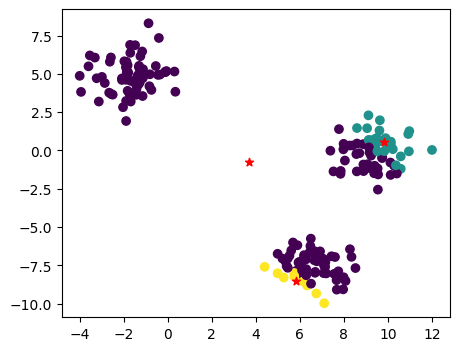

In [28]:
plot_2d(X=points_2d, centroids=centroids2d_1, clusters=clusters2d_1)

In [29]:
# check
np.all(centroids2d_1 == centroids2d_0)

np.False_

#### 2D: Iteration 2

In [30]:
clusters2d_2 = calc_clusters(X=points_2d, centroids=centroids2d_1)
print(clusters2d_2)

[2 0 2 1 2 2 0 2 1 0 1 0 2 2 2 1 1 0 2 1 0 2 2 0 2 0 1 1 0 0 1 0 2 0 2 2 2
 1 1 1 1 1 1 0 2 0 1 2 1 1 0 1 1 0 2 0 1 0 1 1 1 0 2 2 0 2 1 1 1 2 0 0 0 0
 2 1 0 2 2 0 0 0 1 2 2 2 1 2 0 0 0 0 2 0 2 1 1 0 2 0 2 0 2 2 0 0 0 0 1 1 0
 2 2 0 1 1 0 0 1 1 1 1 0 2 2 0 0 0 1 0 0 1 2 2 0 0 1 0 2 2 2 2 1 1 1 1 1 2
 2 1 1 1 2 2 1 1 1 2 0 2 0 0 2 0 2 1 0 1 0 1 0 1 1 2 1 1 0 0 0 0 0 2 2 2 1
 0 2 2 1 2 2 1 2 2 2 0 2 1 1 1]


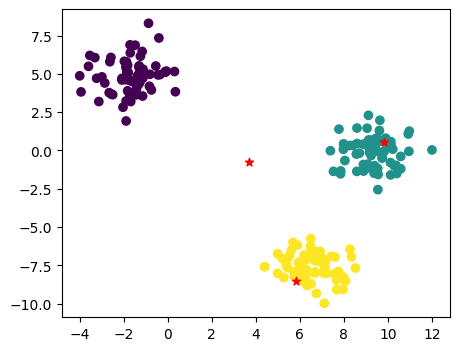

In [31]:
plot_2d(X=points_2d, centroids=centroids2d_1, clusters=clusters2d_2)

In [32]:
centroids2d_2 = calc_centroids(X=points_2d, clusters=clusters2d_2, n_clusters=n_clusters)
print(centroids2d_2)

[[-1.66970149  4.8538806 ]
 [ 9.34895522 -0.12253731]
 [ 6.54757576 -7.5319697 ]]


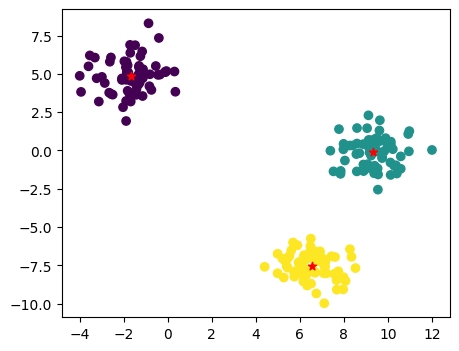

In [33]:
plot_2d(X=points_2d, centroids=centroids2d_2, clusters=clusters2d_2)

In [34]:
# check
np.all(centroids2d_2 == centroids2d_1)

np.False_

#### 2D: Iteration 3

In [35]:
clusters2d_3 = calc_clusters(X=points_2d, centroids=centroids2d_2)
print(clusters2d_3)

[2 0 2 1 2 2 0 2 1 0 1 0 2 2 2 1 1 0 2 1 0 2 2 0 2 0 1 1 0 0 1 0 2 0 2 2 2
 1 1 1 1 1 1 0 2 0 1 2 1 1 0 1 1 0 2 0 1 0 1 1 1 0 2 2 0 2 1 1 1 2 0 0 0 0
 2 1 0 2 2 0 0 0 1 2 2 2 1 2 0 0 0 0 2 0 2 1 1 0 2 0 2 0 2 2 0 0 0 0 1 1 0
 2 2 0 1 1 0 0 1 1 1 1 0 2 2 0 0 0 1 0 0 1 2 2 0 0 1 0 2 2 2 2 1 1 1 1 1 2
 2 1 1 1 2 2 1 1 1 2 0 2 0 0 2 0 2 1 0 1 0 1 0 1 1 2 1 1 0 0 0 0 0 2 2 2 1
 0 2 2 1 2 2 1 2 2 2 0 2 1 1 1]


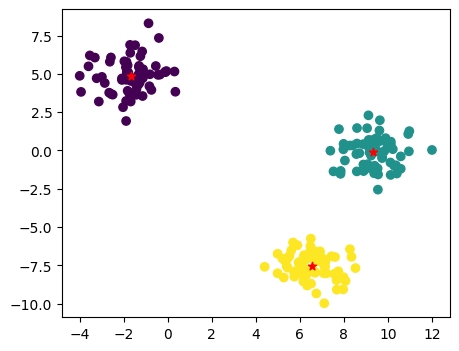

In [36]:
plot_2d(X=points_2d, centroids=centroids2d_2, clusters=clusters2d_3)

In [37]:
centroids2d_3 = calc_centroids(X=points_2d, clusters=clusters2d_3, n_clusters=n_clusters)
print(centroids2d_3)

[[-1.66970149  4.8538806 ]
 [ 9.34895522 -0.12253731]
 [ 6.54757576 -7.5319697 ]]


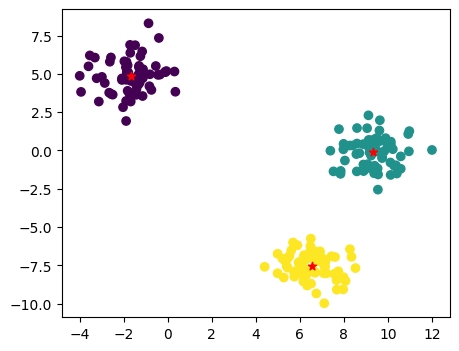

In [38]:
plot_2d(X=points_2d, centroids=centroids2d_3, clusters=clusters2d_3)

In [39]:
np.all(centroids2d_3 == centroids2d_2)

np.True_

It is True, which means centroids did not change in the last iteration, so final clusters array is `clusters2d_3`.

### 3D

In [40]:
def plot_3d(X: NDArray, centroids: NDArray, clusters: NDArray):
    """
        `X` shape => (m1, 3)
        `centroids` shape => (m2, 3)
        `clusters` shape => (m1,)
    """
    fig = plt.figure(figsize=(8, 5))
    ax = plt.axes(projection="3d")

    ax.scatter3D(X[:,0], X[:,1], X[:,2], c=clusters)
    ax.scatter3D(centroids[:,0], centroids[:,1], 
                 centroids[:,2], marker='*', c='red', s=30)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

#### 3D: Initial

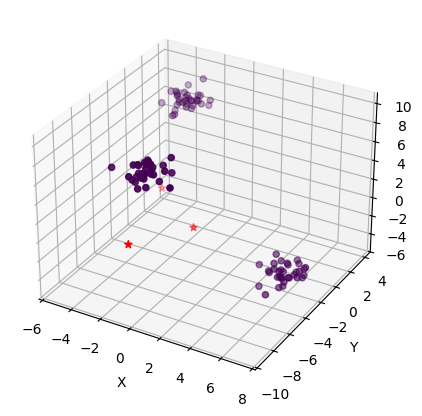

In [41]:
points_3d = pd.read_csv("data/3d_points.csv").to_numpy()

n_clusters = 3
np.random.seed(2) # set seed for reproducibility
centroids3d_0 = np.random.uniform(
    low=points_3d.min(), high=points_3d.max(),
    size=(n_clusters, points_3d.shape[1]))

clusters3d_0 = np.zeros(shape=points_3d.shape[0])
plot_3d(X=points_3d, centroids=centroids3d_0, clusters=clusters3d_0)

#### 3D: Iteration 1

In [42]:
clusters3d_1 = calc_clusters(X=points_3d, centroids=centroids3d_0)
print(clusters3d_1)

[1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 2 0 2 2 0 0 0 0 1 0 1 0 0 0 1 1 2 0 0 1 1
 2 0 2 1 1 1 0 2 2 1 1 1 1 1 0 0 1 1 0 2 0 2 1 1 2 0 1 1 2 1 1 2 2 0 1 2 1
 1 2 1 1 2 1 2 1 0 0 2 1 0 0 1 2 1 2 2 0 1 1 1 1 2 0]


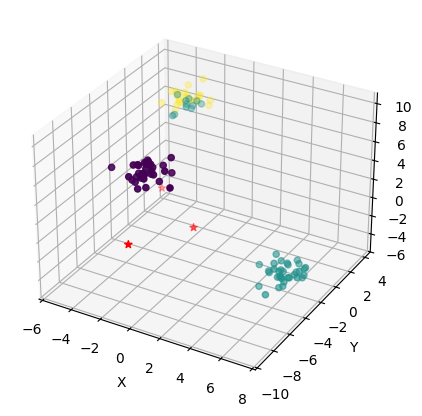

In [43]:
plot_3d(X=points_3d, centroids=centroids3d_0, clusters=clusters3d_1)

In [44]:
centroids3d_1 = calc_centroids(X=points_3d, clusters=clusters3d_1, n_clusters=n_clusters)
print(centroids3d_1)

[[ 0.16636364 -8.35909091  8.89939394]
 [ 3.79636364 -1.5025     -0.68659091]
 [-3.56173913  2.82086957  7.16913043]]


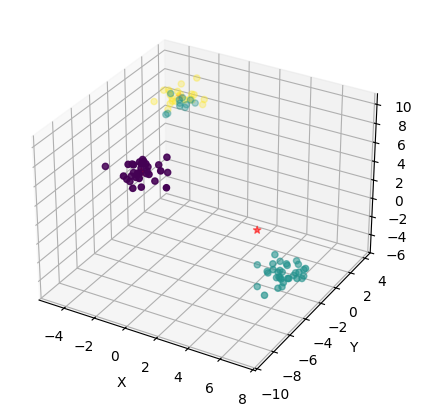

In [45]:
plot_3d(X=points_3d, centroids=centroids3d_1, clusters=clusters3d_1)

In [46]:
# check
np.all(centroids3d_1 == centroids3d_0)

np.False_

#### 3D: Iteration 2

In [47]:
clusters3d_2 = calc_clusters(X=points_3d, centroids=centroids3d_1)
print(clusters3d_2)

[1 1 1 0 0 0 0 1 2 1 0 1 0 1 0 0 2 0 2 2 0 0 0 0 1 0 2 0 0 0 1 1 2 0 0 1 1
 2 0 2 2 1 2 0 2 2 1 2 1 1 1 0 0 1 2 0 2 0 2 1 1 2 0 1 2 2 1 1 2 2 0 1 2 1
 1 2 1 2 2 1 2 2 0 0 2 1 0 0 1 2 1 2 2 0 1 2 1 2 2 0]


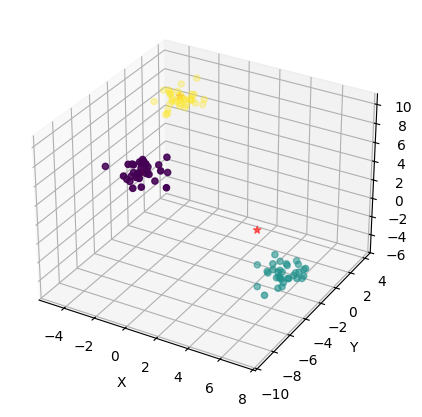

In [48]:
plot_3d(X=points_3d, centroids=centroids3d_1, clusters=clusters3d_2)

In [49]:
centroids3d_2 = calc_centroids(X=points_3d, clusters=clusters3d_2, n_clusters=n_clusters)
print(centroids3d_2)

[[ 0.16636364 -8.35909091  8.89939394]
 [ 6.07090909 -2.62242424 -3.33090909]
 [-3.38882353  2.50911765  7.19411765]]


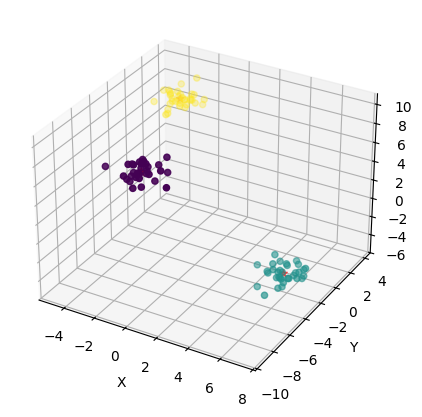

In [50]:
plot_3d(X=points_3d, centroids=centroids3d_2, clusters=clusters3d_2)

In [51]:
# check
np.all(centroids3d_2 == centroids3d_1)

np.False_

#### 3D: Iteration 3

In [52]:
clusters3d_3 = calc_clusters(X=points_3d, centroids=centroids3d_2)
print(clusters3d_3)

[1 1 1 0 0 0 0 1 2 1 0 1 0 1 0 0 2 0 2 2 0 0 0 0 1 0 2 0 0 0 1 1 2 0 0 1 1
 2 0 2 2 1 2 0 2 2 1 2 1 1 1 0 0 1 2 0 2 0 2 1 1 2 0 1 2 2 1 1 2 2 0 1 2 1
 1 2 1 2 2 1 2 2 0 0 2 1 0 0 1 2 1 2 2 0 1 2 1 2 2 0]


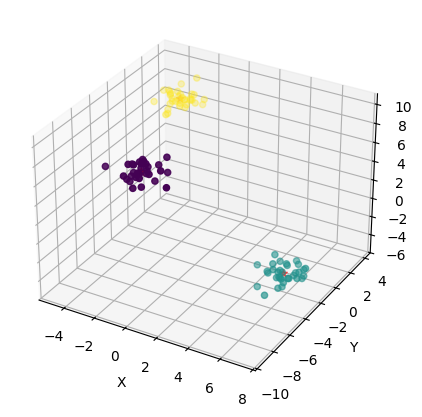

In [53]:
plot_3d(X=points_3d, centroids=centroids3d_2, clusters=clusters3d_2)

In [54]:
centroids3d_3 = calc_centroids(X=points_3d, clusters=clusters3d_3, n_clusters=n_clusters)
print(centroids3d_3)

[[ 0.16636364 -8.35909091  8.89939394]
 [ 6.07090909 -2.62242424 -3.33090909]
 [-3.38882353  2.50911765  7.19411765]]


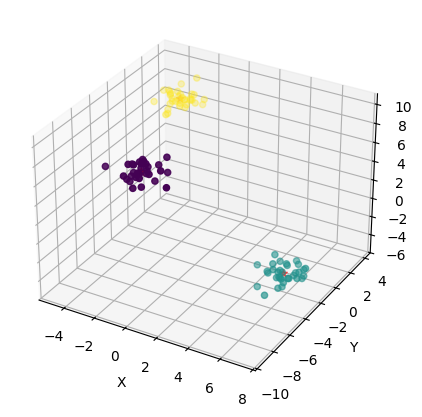

In [55]:
plot_3d(X=points_3d, centroids=centroids3d_2, clusters=clusters3d_2)

In [56]:
# check
np.all(centroids3d_3 == centroids3d_2)

np.True_

It is True, which means centroids did not change in the last iteration, so final clusters array is `clusters3d_3`.

### Building Custom Class

In [57]:
class KMeansCustom:
    def __init__(self, n_clusters: int):
        self.n_clusters = n_clusters
        self.is_fitted = False

    def fit(self, X, y=None):
        # Initial centroids
        self.__cluster_centers = None
        centroids = np.random.uniform(low=X.min(), high=X.max(), 
                                      size=(self.n_clusters, X.shape[1]))

        while not np.all(self.__cluster_centers == centroids):
            self.__cluster_centers = centroids
            clusters = self.calc_clusters(X, centroids)
            centroids = self.calc_centroids(X, clusters, self.n_clusters)

        self.is_fitted = True
        return self
    
    def predict(self, X):
        clusters = self.calc_clusters(X, self.cluster_centers_)
        return clusters

    def fit_predict(self, X, y=None):
        return self.fit(X, y).predict(X)

    @property
    def cluster_centers_(self):
        if not self.is_fitted:
            raise Exception("Model must have fit first")
        return self.__cluster_centers

    @staticmethod
    def euc_dist(point: NDArray, centroids: NDArray):
        """
            `point` shape => (n,)
            `centroids` is ndarray with shape (m, n)
            Returns ndarray with shape (m,), which represents
                distances from the point to center points.
        """
        distances = []
        for centroid in centroids:
            diff = point - centroid
            distances.append(np.sqrt(np.dot(diff.T, diff)))
        return np.array(distances)
    
  
    def calc_clusters(self, X: NDArray, centroids: NDArray):
        """
            `X` shape => (m1, n)
            `centroids` shape => (m2, n)
            Returns clusters shape => (m1,)
        """
        clusters = []
        for point in X:
            distances = self.euc_dist(point, centroids)
            clusters.append(distances.argmin())
        return np.array(clusters)
    

    def calc_centroids(self, X: NDArray, clusters: NDArray, n_clusters: int):
        """
            `X` shape => (m1, n)
            `clusters` shape => (m1,)
            `n_clusters` is number of clusters
            Returns centroids shape => (m2,n)
        """
        centroids = []
        for i in range(n_clusters):
            centroid = X[clusters==i]
            if centroid.size == 0:
                centroids.append(self.__cluster_centers[i])
            else:
                centroids.append(centroid.mean(axis=0))
        return np.array(centroids)


In [58]:
km = KMeansCustom(n_clusters=3)

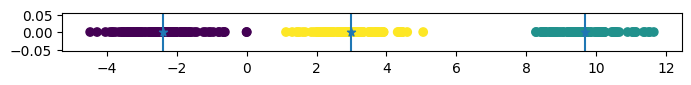

In [59]:
clusters_custom_1d = km.fit_predict(points_1d)
centroids_custom_1d = km.cluster_centers_
plot_1d(X=points_1d, centroids=centroids_custom_1d, clusters=clusters_custom_1d)

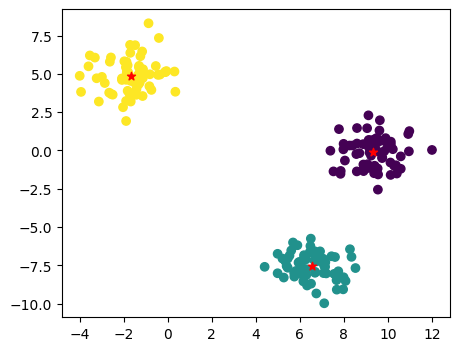

In [66]:
clusters_custom_2d = km.fit_predict(points_2d)
centroids_custom_2d = km.cluster_centers_
plot_2d(X=points_2d, centroids=centroids_custom_2d, clusters=clusters_custom_2d)

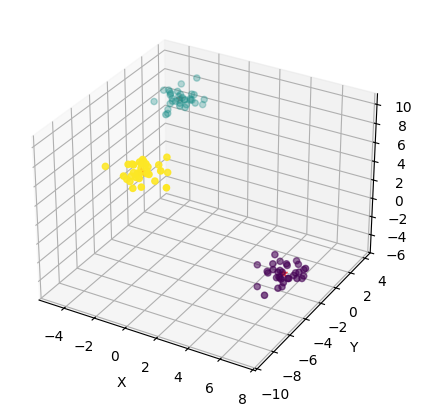

In [67]:
clusters_custom_3d = km.fit_predict(points_3d)
centroids_custom_3d = km.cluster_centers_
plot_3d(X=points_3d, centroids=centroids_custom_3d, clusters=clusters_custom_3d)

### With sklearn

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

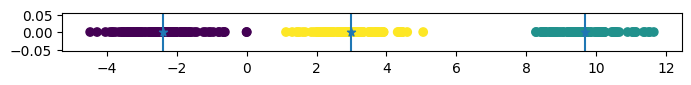

[[-2.41146409]
 [ 9.70026753]
 [ 2.98252374]]


In [63]:
clusters1d = kmeans.fit_predict(points_1d)
centroids1d = kmeans.cluster_centers_
plot_1d(X=points_1d, centroids=centroids1d, clusters=clusters1d)
print(centroids1d)

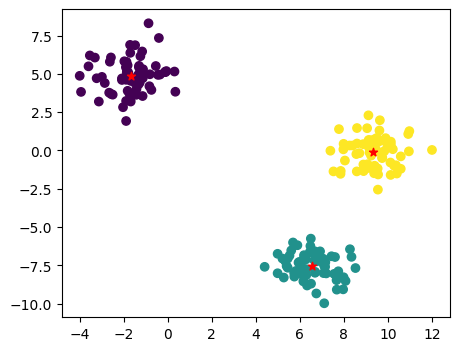

[[-1.66970149  4.8538806 ]
 [ 6.54757576 -7.5319697 ]
 [ 9.34895522 -0.12253731]]


In [64]:
clusters2d = kmeans.fit_predict(points_2d)
centroids2d = kmeans.cluster_centers_
plot_2d(X=points_2d, centroids=centroids2d, clusters=clusters2d)
print(centroids2d)

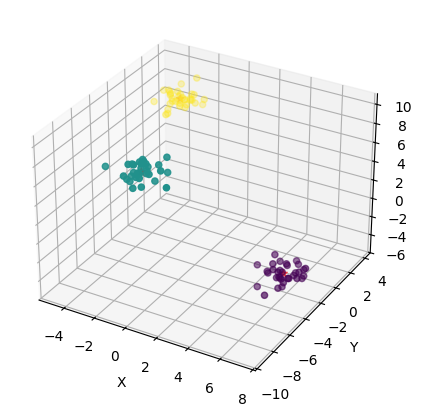

[[ 6.07090909 -2.62242424 -3.33090909]
 [ 0.16636364 -8.35909091  8.89939394]
 [-3.38882353  2.50911765  7.19411765]]


In [65]:
clusters3d = kmeans.fit_predict(points_3d)
centroids3d = kmeans.cluster_centers_
plot_3d(X=points_3d, centroids=centroids3d, clusters=clusters3d)
print(centroids3d)